### Import

In [78]:
import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform

### Fonts

In [79]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Create Nodes

In [80]:
y = []
x = []
depths = []
for i in range(4):
    no_nodes_in_layer = (2**i)
    xvals = np.linspace(0,1,no_nodes_in_layer+2)[1:-1]
    yvals = xvals.copy()
    depth = xvals.copy()
    yvals[:] = i
    depth[:] = i
    x = x + xvals.tolist()
    y = y + yvals.tolist()
    depths = depths + depth.tolist()
x = np.array(x)
y = 1 - (np.array(y) / np.max(y))
X = np.vstack((x,y)).T
X[:,0] = X[:,0]*1.5
depths = np.array(depths)

### Create Edges

In [81]:
edges = []
D = squareform(pdist(X))
for i in range(X.shape[0]):
    depth = depths[i] + 1
    d = D[i,:]
    ind = np.where(depths == depth)[0]
    sortind = np.argsort(d[ind])
    ind = ind[sortind][:2]
    ind = np.sort(ind)[::-1]
    if (len(ind) == 2):
        edge1 = (i,ind[0])
        edge2 = (i,ind[1])
        edges.append(edge1)
        edges.append(edge2)

### Create Graph

In [82]:
graph = {}
for edge in edges:
    node1,node2 = edge
    if node1 in graph:
        neighbors = graph[node1]
        neighbors.append(node2)
        graph[node1] = neighbors
    else:
        graph[node1] = [node2]
    if node2 in graph:
        neighbors = graph[node2]
        neighbors.append(node1)
        graph[node2] = neighbors
    else:
        graph[node2] = [node1]

### Breath First Search Init

In [91]:
start_node = 0
queue = [start_node]
nodelist = range(X.shape[0])
visited = np.zeros((len(nodelist)))
order = np.zeros((len(nodelist))) - 1

### Breadth first search

In [93]:
order_count = 0
while (len(queue) > 0):
    print(queue)
    node = queue[0]
    if (order[node] == -1):
        order[node] = order_count
        order_count = order_count + 1
    visited[node] = 1
    queue = queue[1:]
    neigbors = graph[node]
    for neighbor in neigbors:
        if visited[neighbor] == 0:
            queue = [neighbor] + queue

[ 0.  1.  8.  2.  5.  9. 12.  3.  4.  6.  7. 10. 11. 13. 14.]


### Draw Graph of Visitations

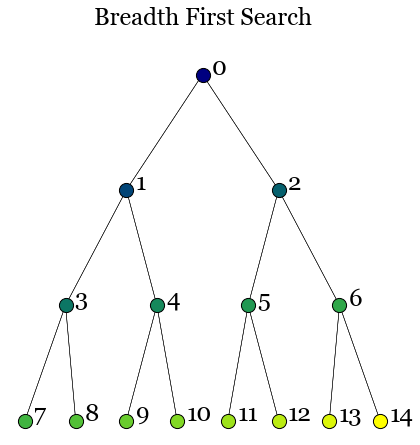

In [96]:
plt.figure(figsize=(7,7))
for node in graph:
    edges = graph[node]
    for edge in edges:
        plt.plot([X[node,0],X[edge,0]],[X[node,1],X[edge,1]],'k',linewidth=0.5)
for i in range(len(order)):
    index = np.where(order == i)[0][0]
    value = i / (len(order)-1)
    plt.scatter(X[i,0],X[i,1],color=(value**2,value**0.5,0.5-(value*0.5)),edgecolor='k',s=200,zorder=100)
    plt.text(X[i,0]+0.03,X[i,1]-0.00,str(i),fontsize=24,**csfont);
plt.grid('off')
plt.axis('off')
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.title('Breadth First Search\n',fontsize=24,**csfont);
plt.savefig('../../assets/figures/020/bfs.png',dpi=300,bbox_inches="tight")   

### Depth First Search Init

In [97]:
start_node = 0
stack = [start_node]
visited = np.zeros((len(nodelist)))
order = np.zeros((len(nodelist))) - 1

### Depth first search recursive helper

In [98]:
order_count = 0
while (len(stack) > 0):
    node = stack[0]
    if (order[node] == -1):
        order[node] = order_count
    order_count = order_count + 1
    visited[node] = 1
    stack = stack[1:]
    neigbors = graph[node]
    for neighbor in neigbors:
        if visited[neighbor] == 0:
            stack = [neighbor] + stack

### Plot

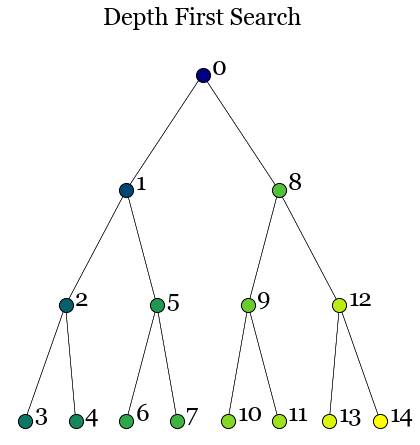

In [99]:
plt.figure(figsize=(7,7))
for node in graph:
    edges = graph[node]
    for edge in edges:
        plt.plot([X[node,0],X[edge,0]],[X[node,1],X[edge,1]],'k',linewidth=0.5)
for i in range(len(order)):
    index = np.where(order == i)[0][0]
    value = i / (len(order)-1)
    plt.scatter(X[index,0],X[index,1],color=(value**2,value**0.5,0.5-(value*0.5)),edgecolor='k',s=200,zorder=100)
    plt.text(X[index,0]+0.03,X[index,1]-0.00,str(i),fontsize=24,**csfont);
plt.grid('off')
plt.axis('off')
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.title('Depth First Search\n',fontsize=24,**csfont);
plt.savefig('../../assets/figures/020/dfs.png',dpi=300,bbox_inches="tight")   